In [1]:
import numpy as np   
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("auto-mpg.csv")  

In [3]:
print(df.shape)

(398, 9)


In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


1. Since all columns have same number of records, it is indicated that there are no missing values in any of the columns.
2. The absence of Horsepower column suggests that the column has some data quality issues.

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df[df.horsepower.str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [8]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [12]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [15]:
df['horsepower']=df['horsepower'].astype('float64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


# EDA

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BFF580400>,
      dtype=object)

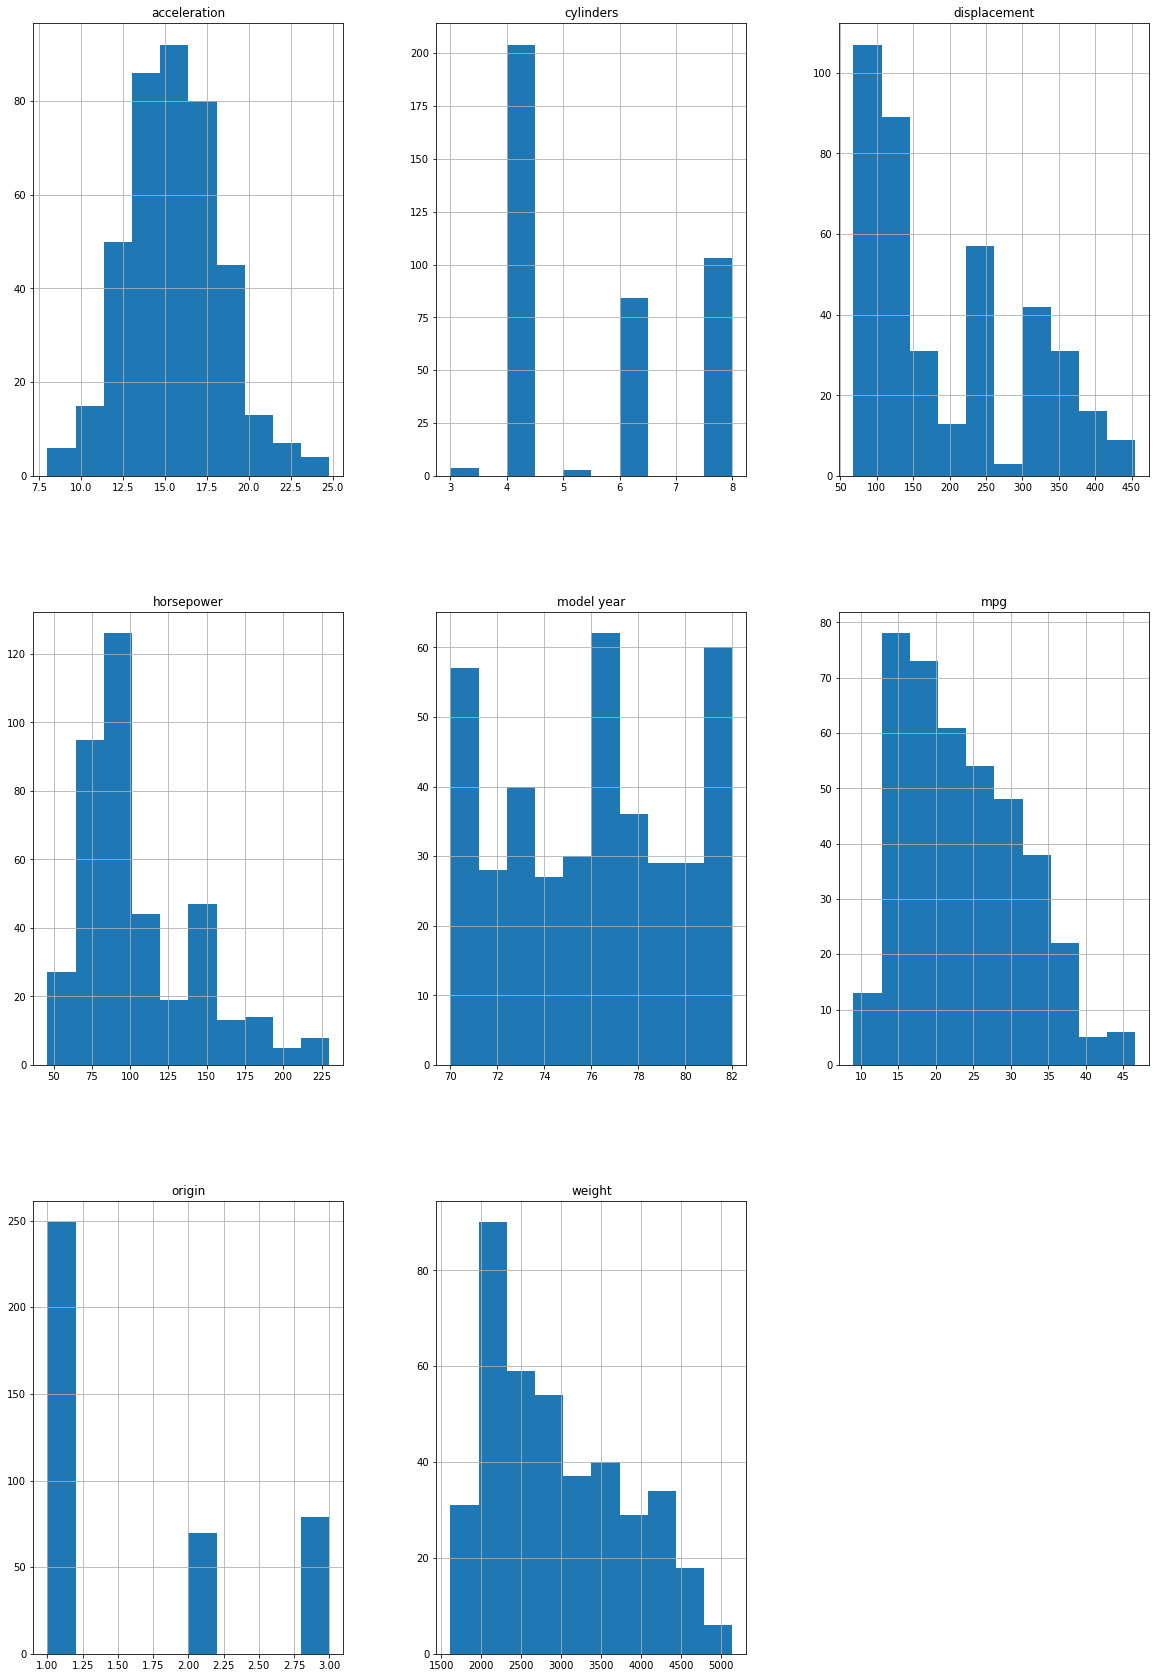

In [18]:
df.hist(figsize=(20,30))

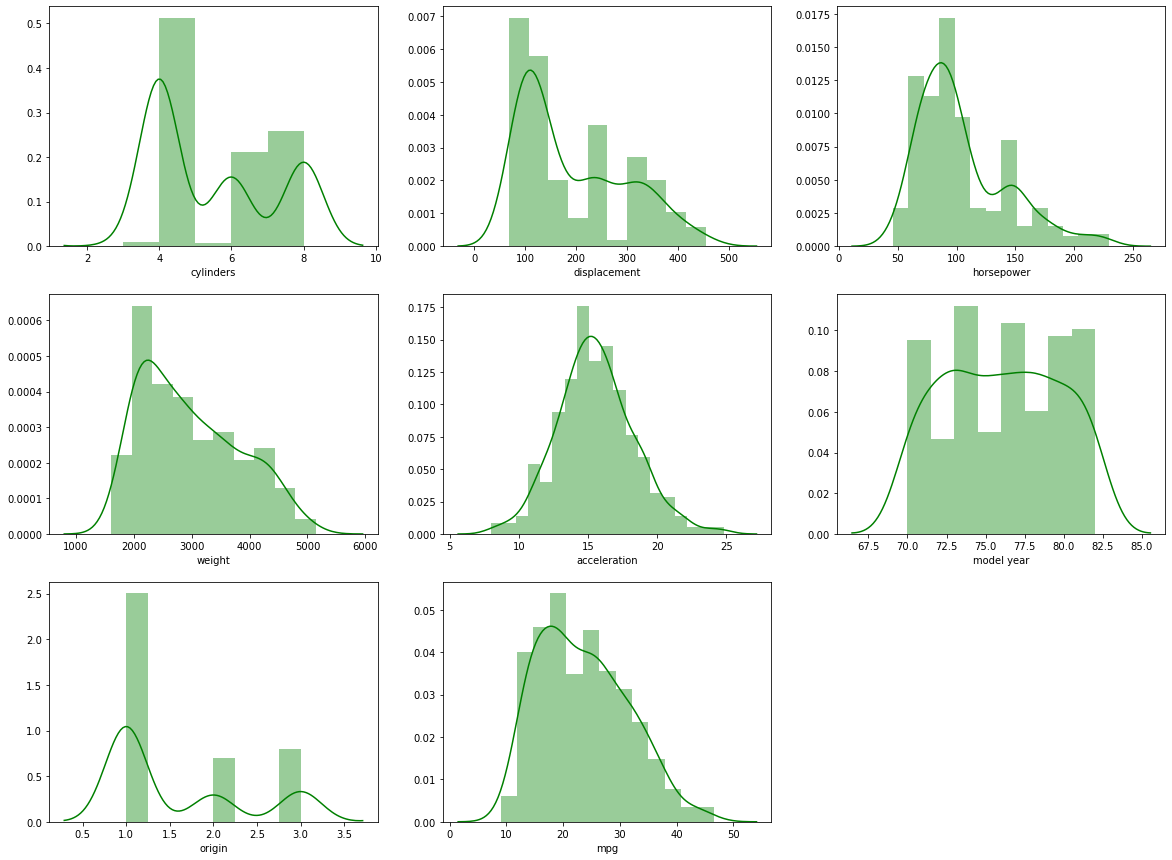

In [19]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(df['cylinders'], color='green')

plt.subplot(3,3,2)
sns.distplot(df['displacement'], color='green')

plt.subplot(3,3,3)
sns.distplot(df['horsepower'], color='green')

plt.subplot(3,3,4)
sns.distplot(df['weight'], color='green')

plt.subplot(3,3,5)
sns.distplot(df['acceleration'], color='green')

plt.subplot(3,3,6)
sns.distplot(df['model year'], color='green')

plt.subplot(3,3,7)
sns.distplot(df['origin'], color='green')

plt.subplot(3,3,8)
sns.distplot(df['mpg'], color='green')

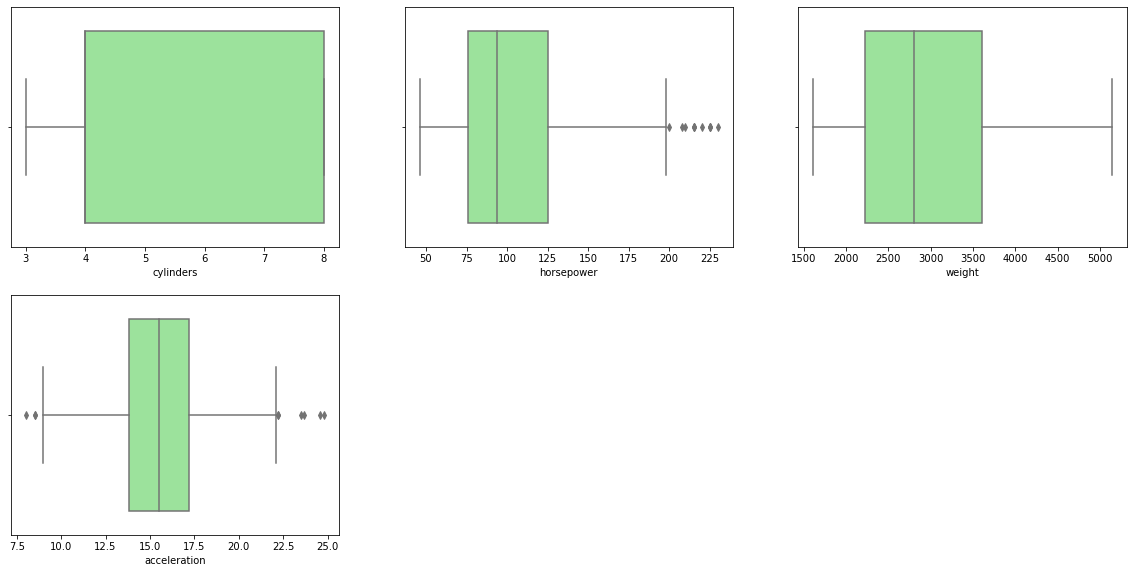

In [20]:
#using boxplots to visualise the outliers 
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.boxplot(x= df['cylinders'], color='lightgreen')

plt.subplot(3,3,2)
sns.boxplot(x= df['horsepower'], color='lightgreen')

plt.subplot(3,3,3)
sns.boxplot(x= df['weight'], color='lightgreen')

plt.subplot(3,3,4)
sns.boxplot(x=df['acceleration'], color='lightgreen')


In [21]:
df['horsepower']=df['horsepower'].clip(lower=df['horsepower'].quantile(0.05), upper=df['horsepower'].quantile(0.95))
df['acceleration']=df['acceleration'].clip(lower=df['acceleration'].quantile(0.05), upper=df['acceleration'].quantile(0.95))

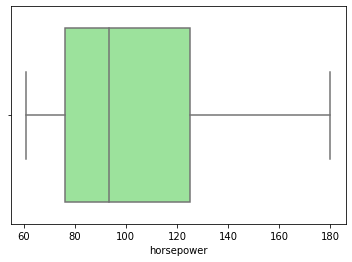

In [22]:
sns.boxplot(df['horsepower'],color='lightgreen')

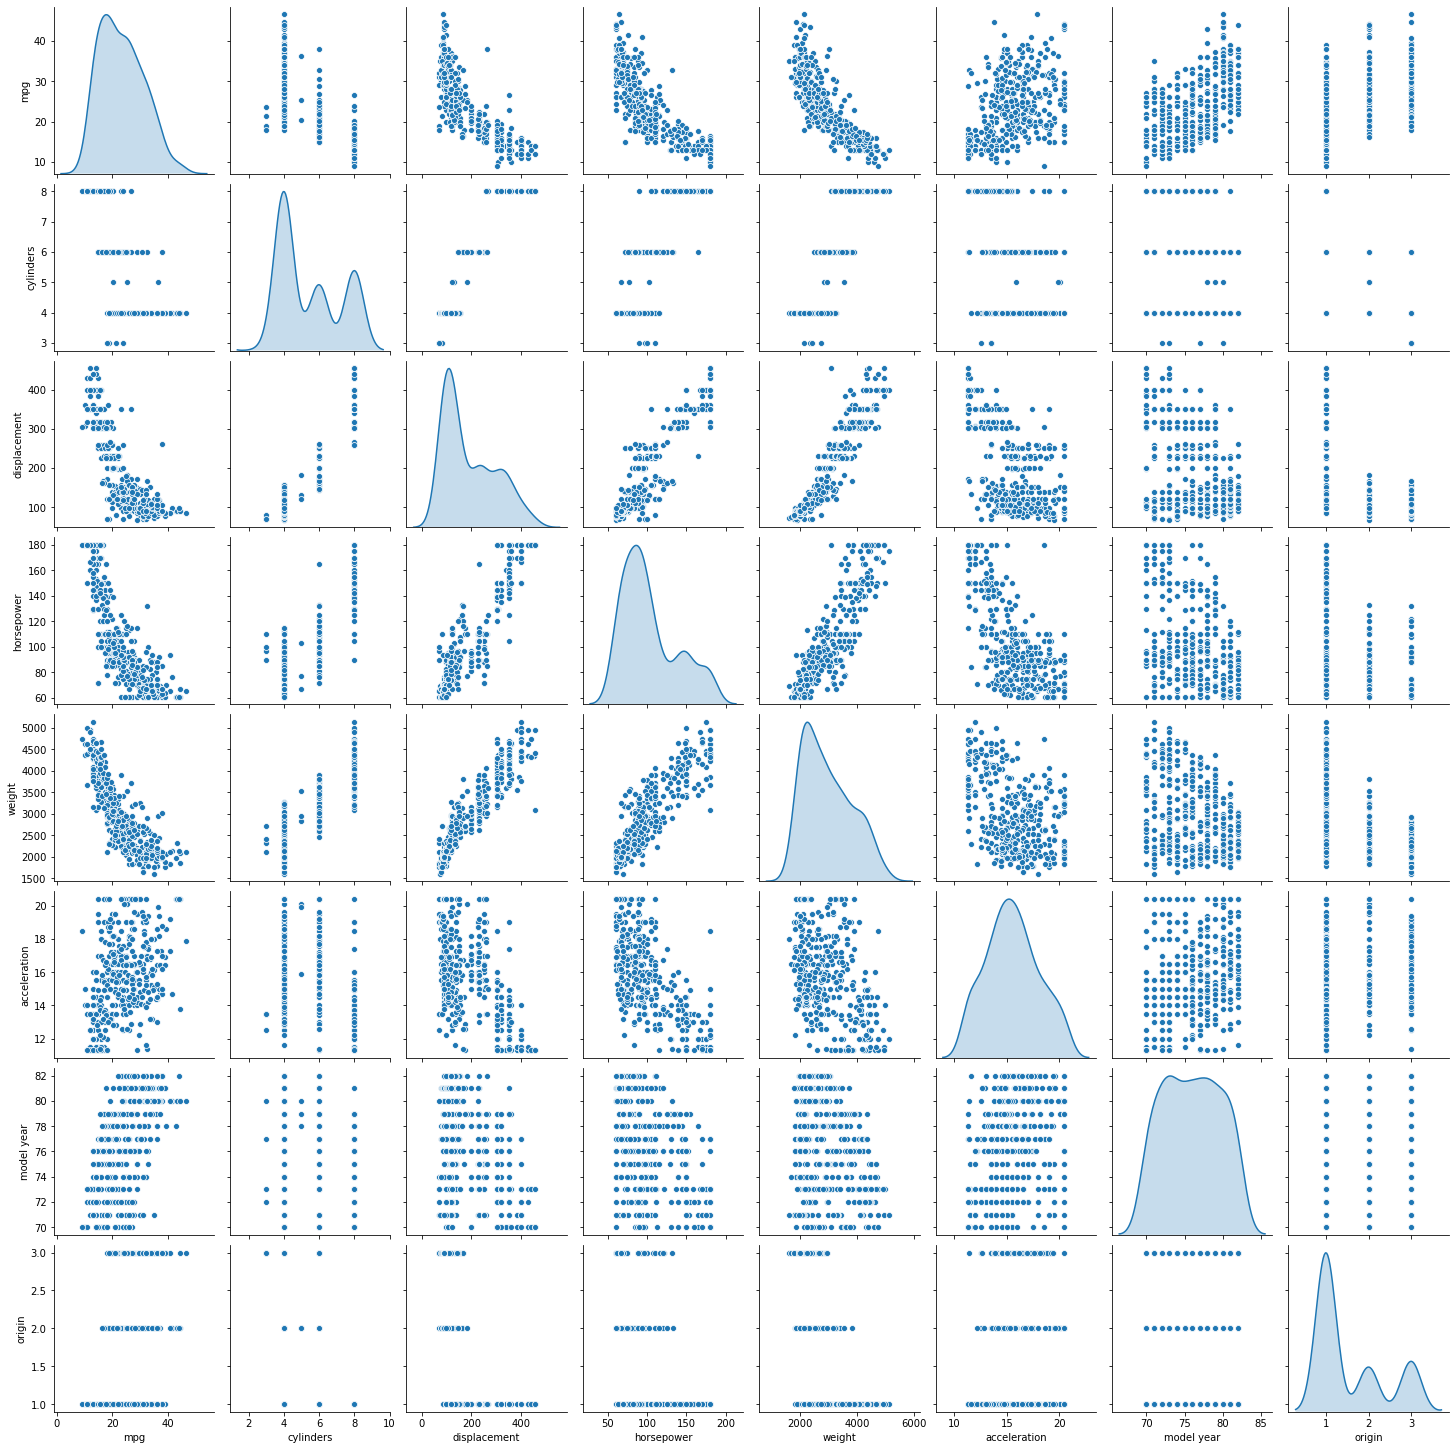

In [23]:
sns.pairplot(df,diag_kind='kde')

In [24]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.792918,-0.831741,0.413128,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.867813,0.896017,-0.510533,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.904191,0.932824,-0.540627,-0.370164,-0.609409
horsepower,-0.792918,0.867813,0.904191,1.000000,0.881944,-0.683607,-0.411420,-0.466110
weight,-0.831741,0.896017,0.932824,0.881944,1.000000,-0.425769,-0.306564,-0.581024
acceleration,0.413128,-0.510533,-0.540627,-0.683607,-0.425769,1.000000,0.272241,0.206228
model year,0.579267,-0.348746,-0.370164,-0.411420,-0.306564,0.272241,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.466110,-0.581024,0.206228,0.180662,1.000000


# Data Preprocessing

In [25]:
df = df.drop('car name', axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


## Custom Data Replcing

We may use the labelencoder as well here

In [27]:
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [28]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.000,70,america
1,15.0,8,350.0,165.0,3693,11.500,70,america
2,18.0,8,318.0,150.0,3436,11.285,70,america
3,16.0,8,304.0,150.0,3433,12.000,70,america
4,17.0,8,302.0,140.0,3449,11.285,70,america


## Here we are using the concept of One-Hot Encoding

In [29]:
df = pd.get_dummies(df, columns=['origin'])

In [30]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.00,3504,12.000,70,1,0,0
1,15.0,8,350.0,165.00,3693,11.500,70,1,0,0
2,18.0,8,318.0,150.00,3436,11.285,70,1,0,0
3,16.0,8,304.0,150.00,3433,12.000,70,1,0,0
4,17.0,8,302.0,140.00,3449,11.285,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790,15.600,82,1,0,0
394,44.0,4,97.0,60.85,2130,20.415,82,0,0,1
395,32.0,4,135.0,84.00,2295,11.600,82,1,0,0
396,28.0,4,120.0,79.00,2625,18.600,82,1,0,0


# Train Test Split

In [31]:
# lets build our linear model
# independant variables
X = df.drop(['mpg','origin_europe'], axis=1)
# the dependent variable
y = df[['mpg']]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(278, 8)
(278, 1)
(120, 8)
(120, 1)


# Model Building

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [37]:
model.score(x_train, y_train)

0.8152075736719523

In [38]:
model.score(x_test, y_test)

0.8427690707190947

In [39]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for cylinders is -0.2559072916523679
The coefficient for displacement is 0.026350678289786968
The coefficient for horsepower is -0.04177193563842459
The coefficient for weight is -0.006791976575540085
The coefficient for acceleration is -0.05739256282872667
The coefficient for model year is 0.8289222733533005
The coefficient for origin_america is -3.0379767941842815
The coefficient for origin_asia is -0.6247408873383312


In [47]:
intercept = model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -15.64305611858875


In [41]:
y_train_predict = model.predict(x_train)

Text(0.5, 0, 'Errors')

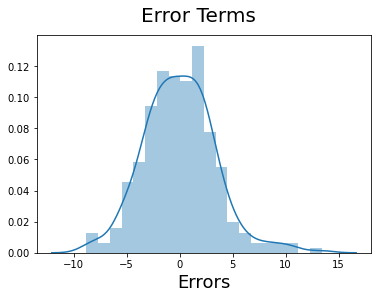

In [42]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [43]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)


In [44]:
x_train_lm

,const,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
350,1.0,4,105.0,63.00,2215,14.900,81,1,0
59,1.0,4,97.0,60.85,2254,20.415,72,0,0
120,1.0,4,121.0,112.00,2868,15.500,73,0,0
12,1.0,8,400.0,150.00,3761,11.285,70,1,0
349,1.0,4,91.0,68.00,1985,16.000,81,0,1
...,...,...,...,...,...,...,...,...,...
393,1.0,4,140.0,86.00,2790,15.600,82,1,0
255,1.0,4,140.0,88.00,2720,15.400,78,1,0
72,1.0,8,304.0,150.00,3892,12.500,72,1,0
235,1.0,4,97.0,75.00,2265,18.200,77,0,1


In [45]:
result = sm.OLS(y_train, x_train_lm).fit()

In [46]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           5.40e-94
Time:                        18:55:00   Log-Likelihood:                -733.38
No. Observations:                 278   AIC:                             1485.
Df Residuals:                     269   BIC:                             1517.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -15.6431      5.723     -2.